# Manali Kulkarni

# Task-3:Unsupervised Machine Learning Algorithm

The task is to predict the optimum number of clusters and represent it visually by using K-Means clustering algorithm. percentage of marks that a student is expected to score based upon the number of hours they studied.Data can be found at https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

# K-Means Clustering

In [3]:
#Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline
sns.set()

In [5]:
#Importing dataset

iris=datasets.load_iris()
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#Data describtion
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
r=iris_data.describe()

In [9]:
r

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

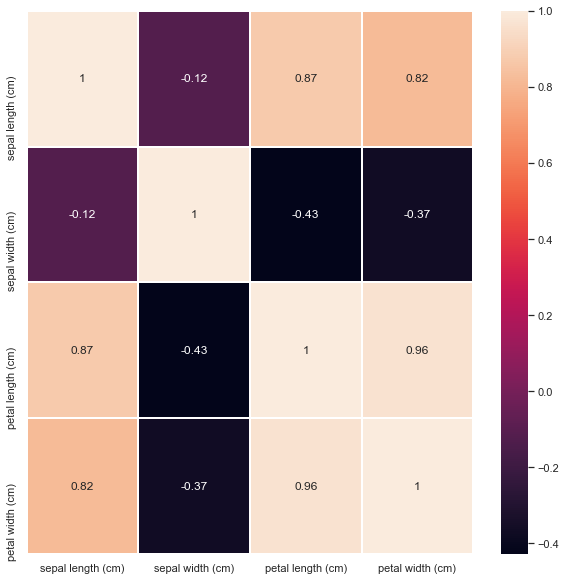

In [11]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(iris_data.corr(),linewidths=1,annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

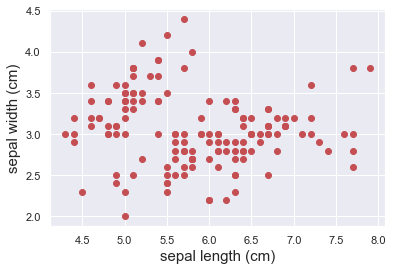

In [20]:
#visualising relation between features
plt.scatter(x='sepal length (cm)',y='sepal width (cm)',data=iris_data,color='r')
plt.xlabel('sepal length (cm)',fontsize=15)
plt.ylabel('sepal width (cm)',fontsize=15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

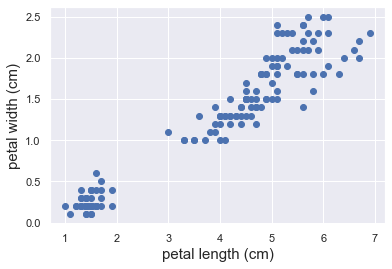

In [21]:
#visualisinng relation between features
plt.scatter(x='petal length (cm)', y='petal width (cm)', data=iris_data, color='b')
plt.xlabel('petal length (cm)', fontsize=15)
plt.ylabel('petal width (cm)', fontsize=15)
plt.show

In [32]:
#finding k using elbow method
wcss=[]
k_range=10
for i in range (1, k_range):
    k=KMeans(i)
    k.fit(iris_data)
    w=k.inertia_
    wcss.append(w)
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.066035353535376,
 34.40900974025975,
 30.064593073593088,
 27.984873433583974]

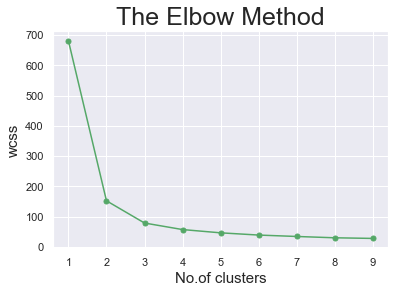

In [37]:
clusters=range(1,k_range)
plt.plot(clusters, wcss, marker='.', color="g", markersize=10)
plt.xlabel('No.of clusters', fontsize=15)
plt.ylabel('wcss',fontsize=15)
plt.title('The Elbow Method',fontsize=25)
plt.show()

We can observe that the "elbow" is the number 3 which is optimal for the case. Now we can run a K-Means using 3 clusters.

In [39]:
kmeans=KMeans(3)
kmeans.fit(iris_data)

KMeans(n_clusters=3)

In [40]:
centers=kmeans.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [41]:
iris_pred=iris_data.copy()
iris_pred['predicted']=kmeans.fit_predict(iris_data)

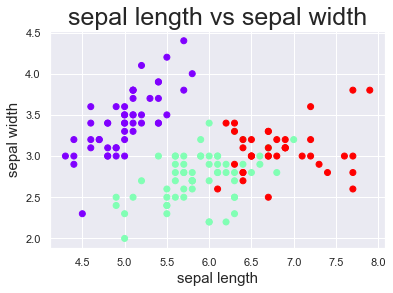

In [44]:
#visualising cluster according to predicted value for sepal length and sepal width
plt.scatter(x='sepal length (cm)',y='sepal width (cm)',c='predicted',cmap='rainbow',data=iris_pred)
plt.xlabel('sepal length',fontsize=15)
plt.ylabel('sepal width', fontsize=15)
plt.title('sepal length vs sepal width', fontsize=25)
plt.show()

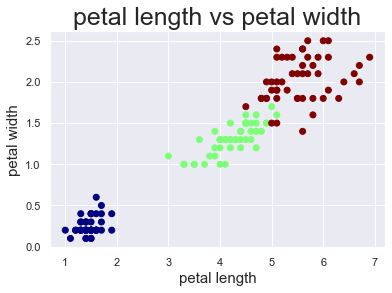

In [47]:
#visualising clusters for true labels
plt.scatter(x='petal length (cm)',y='petal width (cm)',c=iris.target,cmap='jet',data=iris_data)
plt.xlabel('petal length',fontsize=15)
plt.ylabel('petal width',fontsize=15)
plt.title('petal length vs petal width',fontsize=25)
plt.show()